In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import plotly.express as px
from scipy import stats
import textwrap


In [2]:
df = pd.read_excel("Physical Activity Statistics 2025 EN.xlsx", sheet_name=2)
df1 = pd.read_excel("Physical Activity Statistics 2025 EN.xlsx", sheet_name=3)
df2 = pd.read_excel("Physical Activity Statistics 2025 EN.xlsx", sheet_name=4)
df3 = pd.read_excel("Physical Activity Statistics 2025 EN.xlsx", sheet_name=5)
df4 = pd.read_excel("Physical Activity Statistics 2025 EN.xlsx", sheet_name=6)
df5 = pd.read_excel("Physical Activity Statistics 2025 EN.xlsx", sheet_name=7)
df6 = pd.read_excel("Physical Activity Statistics 2025 EN.xlsx", sheet_name=8)
df7 = pd.read_excel("Physical Activity Statistics 2025 EN.xlsx", sheet_name=1)

In [3]:
df.head(20)

,Unnamed: 0,Unnamed: 1
0,NaN,NaN
1,NaN,NaN
2,Percentage of adults (18 years and above) enga...,NaN
3,NaN,NaN
4,Age groups,Percentage
5,NaN,NaN
6,18-29,0.7117
7,30-39,0.6256
8,40-49,0.5607
9,50-59,0.5385


In [4]:
df = df.iloc[4:13]  # row 4 to row 12 inclusive

# Set the first row as header
df.columns = df.iloc[0]
df = df[1:]  # drop the header row from data

# Reset index
df = df.reset_index(drop=True)

# Check the cleaned data
print(df)

4 Age groups Percentage
0        NaN        NaN
1      18-29     0.7117
2      30-39     0.6256
3      40-49     0.5607
4      50-59     0.5385
5      60-69     0.2698
6      70-79     0.1797
7        +80     0.0349


In [5]:
# Drop rows where 'Age groups' is NaN
df = df.dropna(subset=['Age groups']).reset_index(drop=True)

# Convert Percentage to numeric
df['Percentage'] = pd.to_numeric(df['Percentage'])

# Check the cleaned data
print(df)


4 Age groups  Percentage
0      18-29      0.7117
1      30-39      0.6256
2      40-49      0.5607
3      50-59      0.5385
4      60-69      0.2698
5      70-79      0.1797
6        +80      0.0349


In [6]:
# Summary statistics
print(df['Percentage'].describe())

# Find highest and lowest percentage age groups
max_row = df.loc[df['Percentage'].idxmax()]
min_row = df.loc[df['Percentage'].idxmin()]

print("Highest percentage:", max_row['Age groups'], max_row['Percentage'])
print("Lowest percentage:", min_row['Age groups'], min_row['Percentage'])


count    7.000000
mean     0.417271
std      0.254870
min      0.034900
25%      0.224750
50%      0.538500
75%      0.593150
max      0.711700
Name: Percentage, dtype: float64
Highest percentage: 18-29 0.7117
Lowest percentage: +80 0.0349


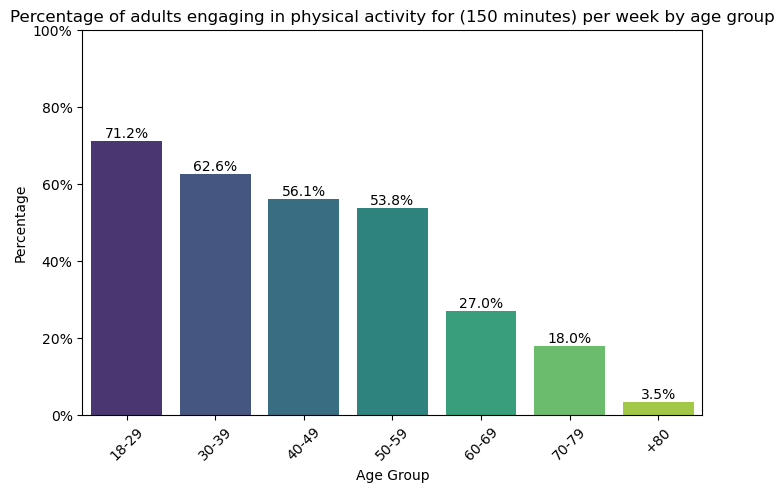

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

plt.figure(figsize=(8,5))
ax = sns.barplot(x='Age groups', y='Percentage', data=df, palette='viridis')

# Format Y-axis as %
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

# Add labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1%}',  # format as percentage
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=10)

plt.title('Percentage of adults engaging in physical activity for (150 minutes) per week by age group')
plt.ylabel('Percentage')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.ylim(0,1.0)  # scale 0-100%
plt.show()


In [8]:
df5.head(20)

,Unnamed: 0,Unnamed: 1
0,NaN,NaN
1,NaN,NaN
2,Percentage of children and adolescents (5-17 y...,NaN
3,NaN,NaN
4,Age groups,Percentage
5,NaN,NaN
6,10-5,0.197
7,17-11,0.1802
8,Total,0.1895
9,Source: Age group (5 - 14 years) Women and Chi...,NaN


In [9]:
df5 = df5.iloc[4:8]  # row 4 to row 12 inclusive

# Set the first row as header
df5.columns = df5.iloc[0]
df5 = df5[1:]  # drop the header row from data

# Reset index
df5 = df5.reset_index(drop=True)

# Check the cleaned data
print(df5)

4 Age groups Percentage
0        NaN        NaN
1       10-5      0.197
2      17-11     0.1802


In [10]:
# Drop rows where 'Age groups' is NaN
df5 = df5.dropna(subset=['Age groups']).reset_index(drop=True)

# Convert Percentage to numeric
df5['Percentage'] = pd.to_numeric(df5['Percentage'])

# Check the cleaned data
print(df5)

4 Age groups  Percentage
0       10-5      0.1970
1      17-11      0.1802


In [11]:
# Summary statistics
print(df5['Percentage'].describe())

# Find highest and lowest percentage age groups
max_row = df5.loc[df5['Percentage'].idxmax()]
min_row = df5.loc[df5['Percentage'].idxmin()]

print("Highest percentage:", max_row['Age groups'], max_row['Percentage'])
print("Lowest percentage:", min_row['Age groups'], min_row['Percentage'])


count    2.000000
mean     0.188600
std      0.011879
min      0.180200
25%      0.184400
50%      0.188600
75%      0.192800
max      0.197000
Name: Percentage, dtype: float64
Highest percentage: 10-5 0.197
Lowest percentage: 17-11 0.1802


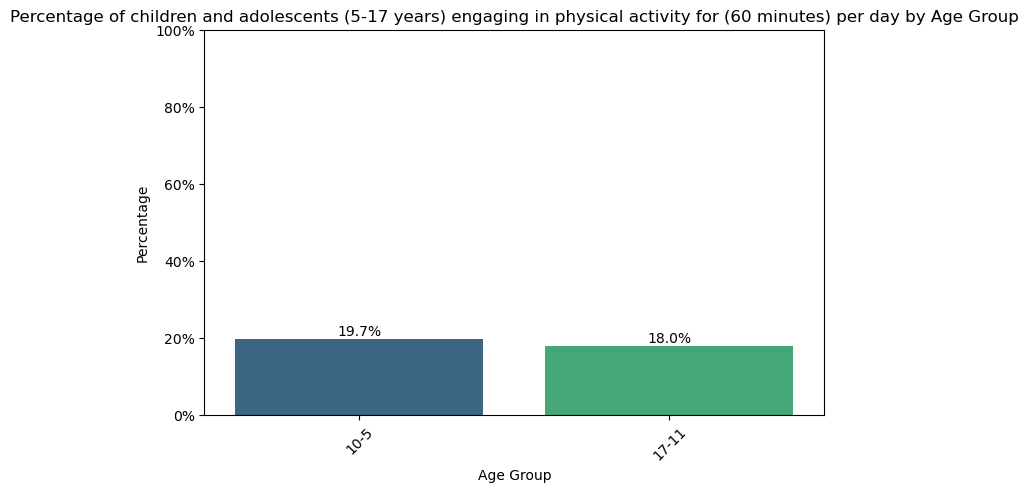

In [12]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x='Age groups', y='Percentage', data=df5, palette='viridis')

# Format Y-axis as %
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

# Add labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1%}',  # format as percentage
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=10)

plt.title('Percentage of children and adolescents (5-17 years) engaging in physical activity for (60 minutes) per day by Age Group')
plt.ylabel('Percentage')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.ylim(0,1.0)  # scale 0-100%
plt.show()

In [13]:
df7 = df7.iloc[4:8].reset_index(drop=True)

# Set the first row as header
df7.columns = df7.iloc[0]
df7 = df7[1:].reset_index(drop=True)

# Drop any rows where 'Gender' is NaN
df7 = df7.dropna(subset=['Gender'])

# Convert Percentage column to numeric
df7['Percentage'] = pd.to_numeric(df7['Percentage'])

# Check cleaned data
print(df7)

0   Gender  Percentage
0    Males      0.6645
1  Females      0.4306
2    Total      0.5905


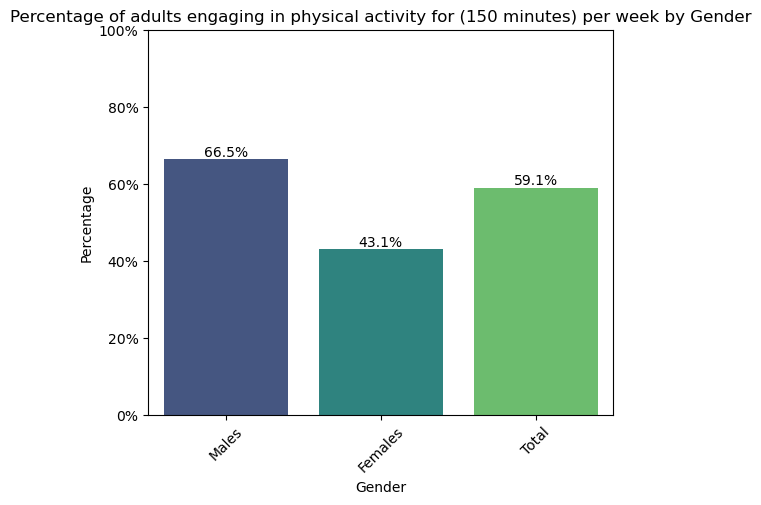

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter


plt.figure(figsize=(6,5))
ax = sns.barplot(x='Gender', y='Percentage', data=df7, palette='viridis')

# Format Y-axis as %
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

# Add labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1%}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=10)
    
plt.title('Percentage of adults engaging in physical activity for (150 minutes) per week by Gender')
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))

plt.xticks(rotation=45)
plt.ylim(0,1)  # Optional: scale 0-100%
plt.show()

In [15]:
df4

,Unnamed: 0,Unnamed: 1
0,NaN,NaN
1,NaN,NaN
2,Percentage of children and adolescents (5-17 y...,NaN
3,NaN,NaN
4,Gender,Percentage
5,Males,0.2326
6,Females,0.1437
7,Total,0.1895
8,Source: Age group (5 - 14 years) Women and Chi...,NaN


In [16]:
df4 = df4.iloc[4:8].reset_index(drop=True)

# Set the first row as header
df4.columns = df4.iloc[0]
df4 = df4[1:].reset_index(drop=True)

# Drop any rows where 'Gender' is NaN
df4 = df4.dropna(subset=['Gender'])

# Convert Percentage column to numeric
df4['Percentage'] = pd.to_numeric(df4['Percentage'])

# Check cleaned data
print(df4)

0   Gender  Percentage
0    Males      0.2326
1  Females      0.1437
2    Total      0.1895


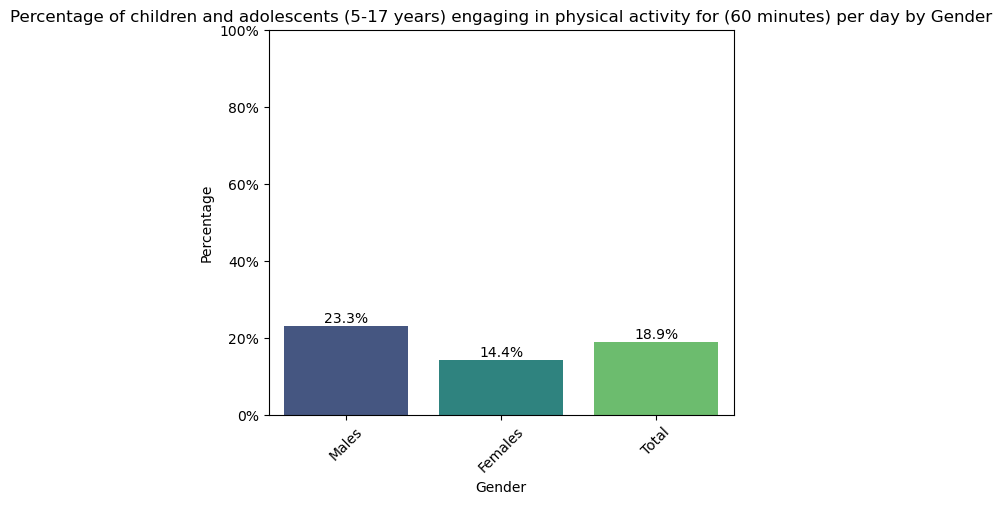

In [17]:
plt.figure(figsize=(6,5))
ax = sns.barplot(x='Gender', y='Percentage', data=df4, palette='viridis')

# Format Y-axis as %
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

# Add labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1%}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=10)
    
plt.title('Percentage of children and adolescents (5-17 years) engaging in physical activity for (60 minutes) per day by Gender')
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))

plt.xticks(rotation=45)
plt.ylim(0,1)  # Optional: scale 0-100%
plt.show()

In [18]:
df1.head(20)

,Unnamed: 0,Unnamed: 1
0,NaN,NaN
1,NaN,NaN
2,Percentage of adults (18 years and above) enga...,NaN
3,NaN,NaN
4,Administrative region,Percentage
5,NaN,NaN
6,Riyadh,0.5901
7,Makkah,0.6761
8,Madinah,0.4885
9,Qassim,0.548


In [19]:
df1 = df1.iloc[4:20].reset_index(drop=True)

# Set the first row as header
df1.columns = df1.iloc[0]
df1 = df1[1:].reset_index(drop=True)

df1 = df1.dropna(subset=['Administrative region'])

# Convert Percentage column to numeric
df1['Percentage'] = pd.to_numeric(df1['Percentage'])

# Check cleaned data
print(df1)

0  Administrative region  Percentage
1                 Riyadh      0.5901
2                 Makkah      0.6761
3                Madinah      0.4885
4                 Qassim      0.5480
5         Eastern Region      0.4968
6                  Aseer      0.4841
7                  Tabuk      0.6412
8                   Hail      0.6051
9       Northern Borders      0.6227
10                 Jazan      0.5781
11                Najran      0.5892
12               Al-Baha      0.4594
13               Al-Jouf      0.5291
14                 Total      0.5905


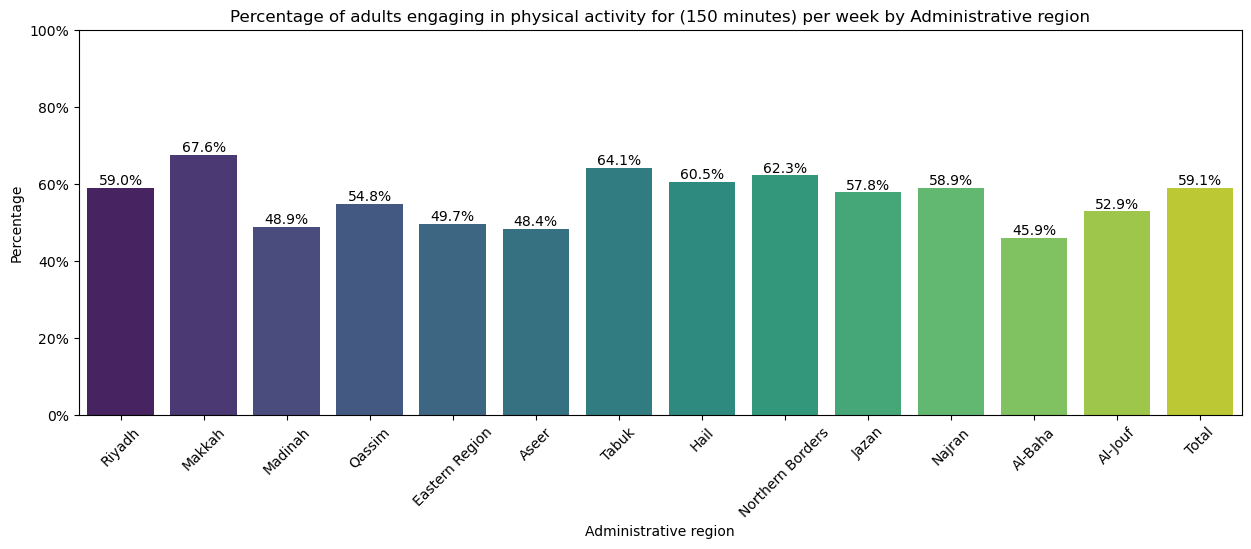

In [20]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='Administrative region', y='Percentage', data=df1, palette='viridis')

# Format Y-axis as %
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

# Add labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1%}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=10)
    
plt.title('Percentage of adults engaging in physical activity for (150 minutes) per week by Administrative region')
plt.ylabel('Percentage')
plt.xlabel('Administrative region')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))

plt.xticks(rotation=45)
plt.ylim(0,1)  # Optional: scale 0-100%
plt.show()

In [21]:
df2.head(20)

,Unnamed: 0,Unnamed: 1
0,NaN,NaN
1,NaN,NaN
2,Percentage of adults (18 years and above) enga...,NaN
3,NaN,NaN
4,activity type,Percentage
5,NaN,NaN
6,Work-related physical activity,0.4394
7,Non work-related physical activity,0.3778
8,Transportation and non-physical activities,0.5714
9,Source: National Health Survey 2025,NaN


In [22]:
df2 = df2.iloc[4:9].reset_index(drop=True)

# Set the first row as header
df2.columns = df2.iloc[0]
df2 = df2[1:].reset_index(drop=True)

df2 = df2.dropna(subset=['activity type'])

# Convert Percentage column to numeric
df2['Percentage'] = pd.to_numeric(df2['Percentage'])

# Check cleaned data
print(df2)

0                                activity type  Percentage
1              Work-related physical activity       0.4394
2          Non work-related physical activity       0.3778
3  Transportation and non-physical activities       0.5714


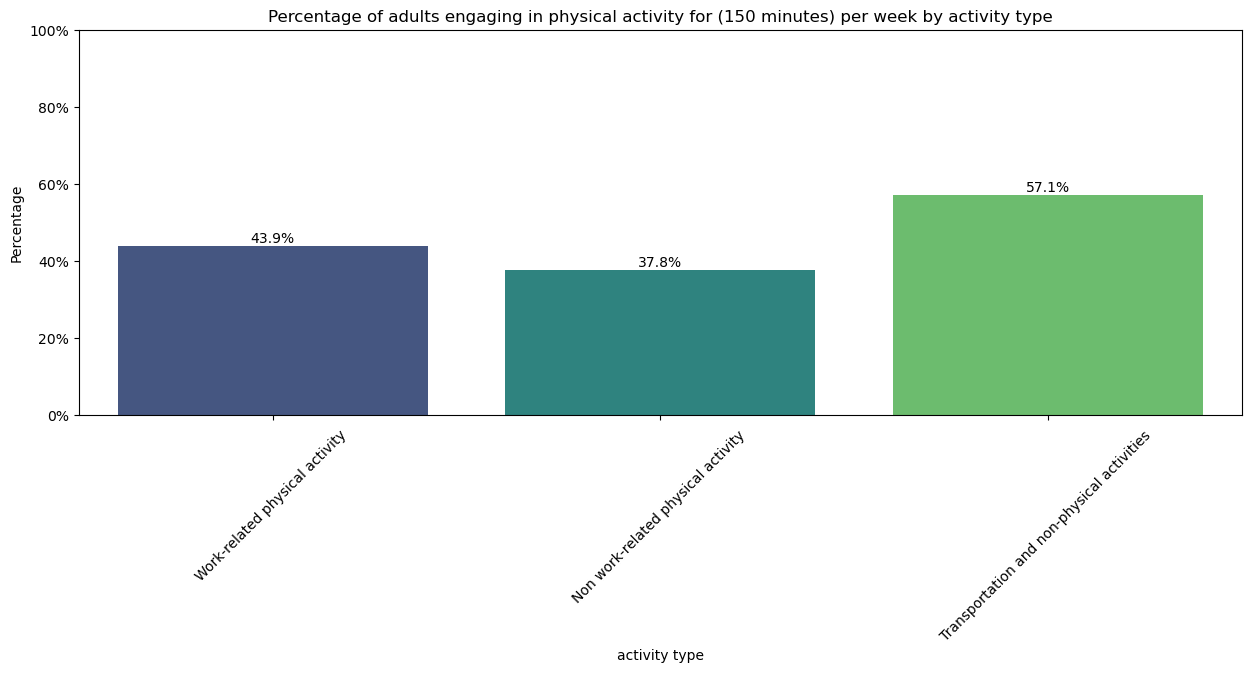

In [23]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='activity type', y='Percentage', data=df2, palette='viridis')

# Format Y-axis as %
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

# Add labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1%}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=10)
    
plt.title('Percentage of adults engaging in physical activity for (150 minutes) per week by activity type')
plt.ylabel('Percentage')
plt.xlabel('activity type')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))

plt.xticks(rotation=45)
plt.ylim(0,1)  # Optional: scale 0-100%
plt.show()

In [24]:
df3.head(20)

,Unnamed: 0,Unnamed: 1
0,NaN,NaN
1,NaN,NaN
2,Average minutes spent daily by adults sitting ...,NaN
3,NaN,NaN
4,Gender,Average minutes
5,NaN,NaN
6,Males,304
7,Females,319
8,Total,309
9,Source: National Health Survey 2025,NaN


In [25]:
df3 = df3.iloc[4:9].reset_index(drop=True)

# Set the first row as header
df3.columns = df3.iloc[0]
df3 = df3[1:].reset_index(drop=True)

# Drop rows where 'Gender' is NaN
df3 = df3.dropna(subset=['Gender'])

# Convert 'Average minutes' to numeric
df3['Average minutes'] = pd.to_numeric(df3['Average minutes'])

# Check cleaned data
print(df3)

0   Gender  Average minutes
1    Males              304
2  Females              319
3    Total              309


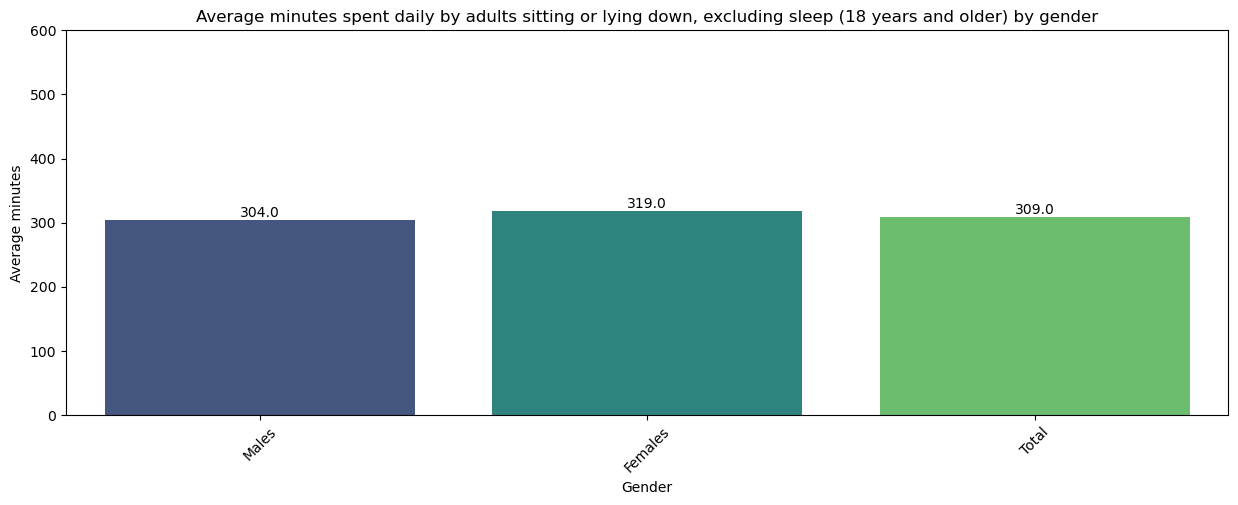

In [26]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='Gender', y='Average minutes', data=df3, palette='viridis')

# Format Y-axis as %
#ax.yaxis.set_major_formatter(PercentFormatter(1.0))

# Add labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(height,
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=10)
    
plt.title('Average minutes spent daily by adults sitting or lying down, excluding sleep (18 years and older) by gender')
plt.ylabel('Average minutes')
plt.xlabel('Gender')
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))

plt.xticks(rotation=45)
plt.ylim(0,600)  # Optional: scale 0-100%
plt.show()

In [27]:
df6

,Unnamed: 0,Unnamed: 1
0,NaN,NaN
1,NaN,NaN
2,Average daily sedentary hours among children ...,NaN
3,NaN,NaN
4,sedentary hours,Percentage
5,NaN,NaN
6,Less than an hour,0.2014
7,One to two hours,0.3455
8,Two to three hours,0.2371
9,From 3 hours to less than 4 hours,0.1324


In [28]:
df6 = df6.iloc[4:13].reset_index(drop=True)

# Set the first row as header
df6.columns = df6.iloc[0]
df6 = df6[1:].reset_index(drop=True)

df6 = df6.dropna(subset=['sedentary hours'])

# Convert Percentage column to numeric
df6['Percentage'] = pd.to_numeric(df1['Percentage'])

# Check cleaned data
print(df6)

0                    sedentary hours  Percentage
1                  Less than an hour      0.5901
2                   One to two hours      0.6761
3                 Two to three hours      0.4885
4  From 3 hours to less than 4 hours      0.5480
5                    4 hours or more      0.4968
6                      I don't know       0.4841
7                              Total      0.6412


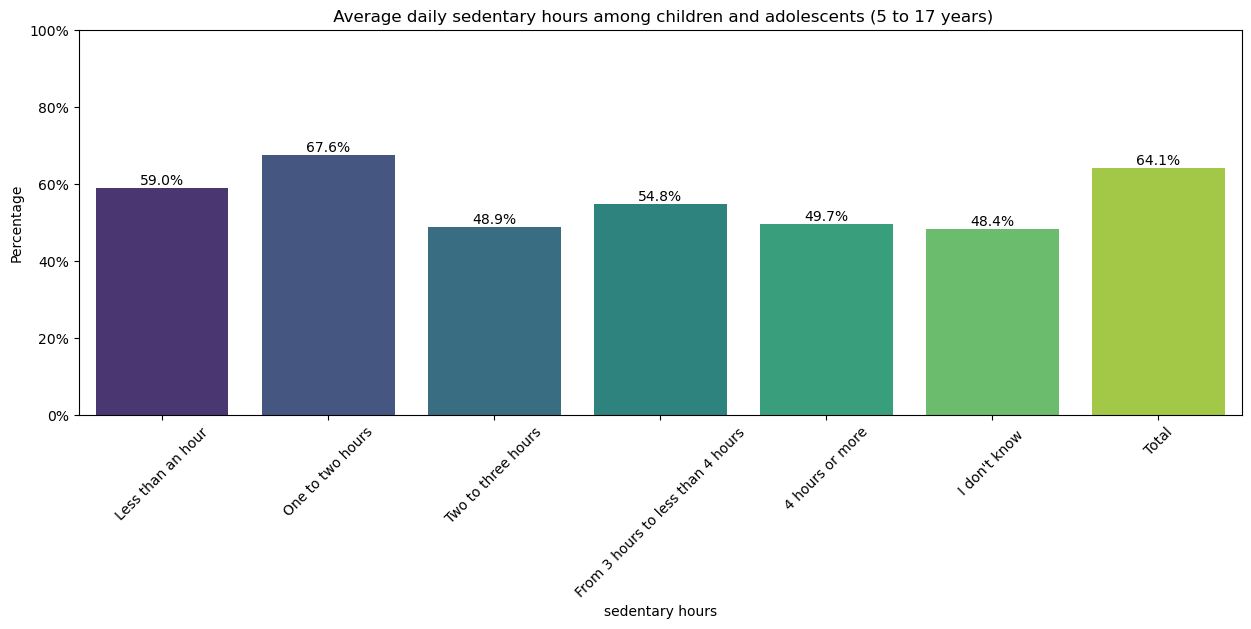

In [30]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='sedentary hours', y='Percentage', data=df6, palette='viridis')

# Format Y-axis as %
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

# Add labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1%}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=10)
    
plt.title(' Average daily sedentary hours among children and adolescents (5 to 17 years)')
plt.ylabel('Percentage')
plt.xlabel('sedentary hours')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))

plt.xticks(rotation=45)
plt.ylim(0,1)  # Optional: scale 0-100%
plt.show()